## Grip @The Sparks Foundation JUNE-2021
## Field : Data Science and Business Analytics
## TASK 1 : Prediction using Supervised ML
To Predict the percentage of marks of the students based on the number of hours they studied
### By : Nagesh Pawde

### Importing Libraries and dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

### Data Exploration

In [10]:
#Retrieves the first ten records from the dataset. 
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [51]:
#Retrieves the last ten records from the dataset. 
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [13]:
df.shape

(25, 2)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [16]:
#Gives the statistical info.
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

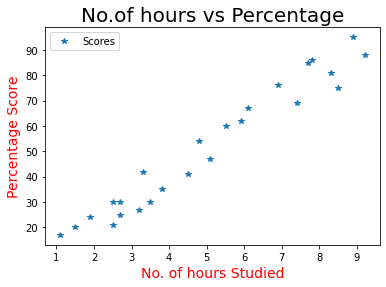

In [20]:
df.plot(x='Hours', y='Scores', style='*')  
plt.title('No.of hours vs Percentage',color='black',size=20)  
plt.xlabel('No. of hours Studied',color='red',size=14)  
plt.ylabel('Percentage Score',color='red',size=14)  
plt.show()

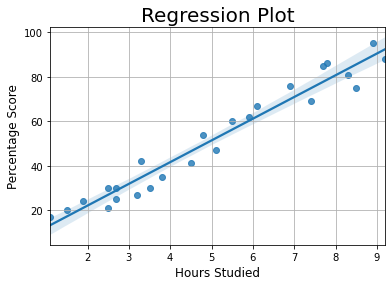

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [31]:
import seaborn as sns
sns.regplot(x= df['Hours'], y= df['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Percentage Score', size=12)
plt.xlabel('Hours Studied', size=12)
plt.grid(True)
plt.show()
print(df.corr())

### Training the Model

### 1) Splitting the Data

In [34]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### 2) Fitting the Data into the model

In [35]:
regression = LinearRegression()
regression.fit(train_X, train_y)

LinearRegression()

### Making Predictions

In [36]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparing the Predicted Marks with the Actual Marks

In [37]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


### Visually Comparing the Predicted Marks with the Actual Marks

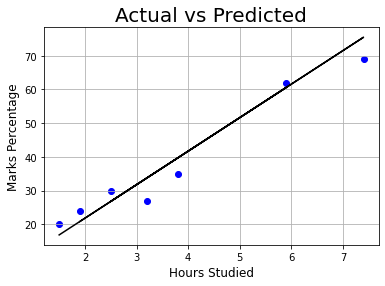

In [39]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.grid()
plt.show()

### Evaluating the Algorithm

In [40]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502486


### Solving the problem statement

In [50]:
hours = 9.25
print("No of Hours studied = {}".format(hours))
print("Predicted Score = ")
print(regression.predict([[hours]]))

No of Hours studied = 9.25
Predicted Score = 
[93.89272889]


#### if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.